# Minitrabalho de DAA
Trabalho realizado por:
- Gonçalo Ribeiro, nº 110730
- Rodrigo Leitão, nº 111008

## **1)** Algoritmo de força-bruta

#### **1.a)** [1 valor] Descreva brevemente qual seria o algoritmo de força-bruta que resolve o problema do número de inversões num array.

**R.:** Um algoritmo no qual se corre o array todo e que por cada elemento se verificam todos os elementos à sua frente e em todos que satisfaçam a condição de serem menores, incrementa-se uma variável que guarda o total de ocorrências.

#### **1.b)** [1 valor] Implemente em Python o algoritmo descrito na alínea anterior. O algoritmo deve receber como entrada uma coleção de inteiros, e devolver o número de inversões encontrados nesta coleção.

In [15]:
def forca_bruta(array):
    result = 0
    size = len(array)
    for i in range(size):
        for j in range(i+1, size):
            if array[i] > array[j]:
                result += 1
    return result

#### **1.c)** [3 valores] Apresente uma análise assintótica do seu algoritmo, considerando o número de acessos ao array (ou seja, o número de acessos para leitura e escrita de uma posição do array) que são executados para **o seu algoritmo** em função do tamanho, **n**, do array.

- **Nota:** É esperado que sejam apresentados os cálculos completos do número de acessos assim como a correspondente conclusão sobre o tempo de execução do algoritmo (utilizando notação assintótica).

**R.:** No nosso algortimo podemos observar dois loops `for`, em que o primeiro percorre o array todo, e o segundo percorre os elementos à direita do atual do primeiro loop. 

Tendo isto em conta e que por cada ciclo completo são feitos 2 acessos ao array durante a comparação, podemos concluir que o número total de acessos, em função do tamanho, n, do array, vai ser: $2\times\frac{(n-1)n}{2}$ (obtém-se através da adaptação da fórmula da soma dos n primeiros números naturais, uma vez que no primeiro ciclo completo fazemos n - 1 comparações), simplificando $(n-1)n$.

Concluimos então que o tempo de execução do algoritmo, em notação assintótica é $O(n^2)$.

## **2)** Algoritmo dividir-e-conquistar

#### **2.a)** [3 valores] Proponha uma solução melhorada que utilize a estratégia dividir-e-conquistar para resolver o problema do número de inversões num array de forma mais eficiente.

- **Nota:** É esperado que sejam descritos os passos básicos para a conceção do seu algoritmo. Deve também apresentar o pseudocódigo correspondente.
- **Dica:** A solução passará por utilizar um dos algoritmos de ordenação abordados nas aulas.

**R.:** O nosso algoritmo baseia-se no merge sort e funciona da seguinte forma:
- divide o array em metades até todas serem de tamanho 1
- junta as metades ordenando-as e contando as inversões
- sempre que um elemento da direita é maior que um elemento da esquerda, são contadas tantas inversões quantos elementos restam na metade esquerda

```
def versao_melhorada(arr):
    _, inversions = count_inversions(arr)
    return inversions

def count_inversions(arr):
    if len of arr <= 1:
        return arr, 0
    else:
        mid = ⌊len of arr / 2⌋
        left, inv_left = count_inversions(arr from start to mid)
        right, inv_right = count_inversions(arr from mid to end)
        merged, inv_merge = merge_and_count(left, right)
        return merged, inv_left + inv_right + inv_merge

def merge_and_count(left, right):
    i = j = inv_count = 0

    while i < len of left and j < len of right:
        if left[i] <= right[j]:
            append left[i] to merged
            i += 1
        else:
            append right[j] to merged
            inv_count += remaining items in left
            j += 1

    append remaining items in left to merged
    append remaining items in right to merged
    return merged, inv_count
```

#### **2.b)** [2 valores] Implemente em Python o algoritmo descrito na alínea anterior. O algoritmo deve receber como entrada uma coleção de inteiros, e devolver o número de inversões encontrados nesta coleção.

In [16]:
def versao_melhorada(arr):
    _, inversions = count_inversions(arr)
    return inversions

def count_inversions(arr):
    if len(arr) <= 1:
        return arr, 0
    else:
        mid = len(arr) // 2
        left, inv_left = count_inversions(arr[:mid])
        right, inv_right = count_inversions(arr[mid:])
        merged, inv_merge = merge_and_count(left, right)
        return merged, inv_left + inv_right + inv_merge

def merge_and_count(left, right):
    i = j = inv_count = 0
    merged = []
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            inv_count += len(left) - i
            j += 1
    merged += left[i:]
    merged += right[j:]
    return merged, inv_count

#### **2.c)** [3 valores] Utilizando o método de indução, mostre que o seu algoritmo está correto.

- **Nota:** Inicie por apresentar um pseudocódigo simplificado do seu algoritmo (se ainda não o fez na
alínea **2.a)**). Para facilitar, pode também considerar que o tamanho **n** do array é uma potência de 2.

**R.:** **Hipótese de Indução**: O algoritmo está correto para todos os arrays de tamanho menor ou igual a n.

**Caso Base**: Para um array de tamanho menor ou igual a 1, o algoritmo está correto pois não há inversões.

**Passo Indutivo**: Provar que o algoritmo está correto para $k=n$, assumindo que a hipótese de indução é verdadeira para $k<n$.

O array é dividido em duas metades e, pela hipótese de indução, sabemos que o algoritmo conta corretamente as inversões em cada metade. 

Agora, precisamos de considerar as inversões entre as duas metades, que são contadas pela função merge_and_count. Esta função percorre cada metade uma vez, comparando o elemento atual da esquerda com o elemento atual da direita. Se o elemento da esquerda for menor ou igual ao da direita, este é colocado no array final sem ser contada nenhuma inversão. Se, por outro lado, este for maior, sabemos que o elemento da direita vai ser menor que todos os restantes elementos da esquerda (visto que o array está ordenado devido ao caso base e à hipótese de indução). Assim, são contadas tantas inversões quantos elementos restam na metade esquerda.

**Conclusão**: Todas as inversões são contadas corretamente e por isso o algoritmo devolve o número de inversões para qualquer array de tamanho menor ou igual a n.

#### **2.d)** [3 valores] Apresente uma análise assintótica do seu algoritmo, utilizando uma das técnicas abordadas em aula, ou seja, o teorema principal, ou o método da indução e substituição.

- **Nota:** É esperado que apresente a fórmula recorrente do cálculo do trabalho do seu algoritmo bem como os passos necessários para estabelecer a ordem de complexidade do algoritmo (utilizando notação assintótica).

**R.:**

• O caso base (tamanho 1) e a divisão (cálculo do mid) têm custo contante: O(1)

• São feitas 2 chamadas recorrentes para metade (aproximadamente, devido aos arredondamentos) dos elementos da entrada: n/2 (na verdade, faz ⌊n/2⌋)

• O custo de merge_and_count é O(n) visto que os dois arrays de tamanho n/2 são percorridos na totalidade

Logo a fórmula recorrente é $T(n)=2T(\frac{n}{2})+O(n)$

E, pelo teorema principal, a ordem de complexidade do algoritmo é $O(n\log n)$, pois $a=b^d$ ($2=2^1$) que corresponde à fórmula $T(n)=O(n^d\log n)$.

## **3)** Análise empírica

#### **3.a)** [1 valores] Crie uma bateria de testes e cronometre o tempo de execução de cada um dos algoritmos desenvolvidos em **1)** e **2)**. Repita cada cronometragem, pelo menos, 35 vezes e registe o tempo médio de execução para cada algoritmo.

- **Nota:** Exatamente a mesma coleção deve ser gerada antes das invocações dos diferentes algoritmos nos respetivos testes. Esta coleção deve conter números inteiros aleatórios sem repetição.

In [17]:
from time import time

def tryItABunch(myFn, testArrays, numTrials=35):
    nValues = []
    tValues = []
    for arr in testArrays:
        # run myFn several times and average to get a decent idea.
        runtime = 0
        for _ in range(numTrials):
            start = time()
            myFn(arr)
            end = time()
            runtime += (end - start) * 1000  # measure in milliseconds
        runtime = runtime / numTrials
        nValues.append(len(arr))
        tValues.append(runtime)
    return nValues, tValues

In [18]:
# Função de teste apenas para gerar o gráfico de O(n^2)
def quadratica(arr):
	for i in range(len(arr)):
		for j in range(len(arr)):
			arr[i] > arr[j]

In [19]:
from math import log

# Função de teste apenas para gerar o gráfico de O(n log n)
def n_log_n(arr):
    for i in range(len(arr)):
        for j in range(int(log(len(arr)))):
            arr[i] > arr[j]

In [20]:
from random import shuffle
testArrays = []

# Generate arrays of length n (from 50 to 1000 with step 50) containing numbers until n in a random order
for n in range(50, 1000, 50):
	arr = list(range(n))
	shuffle(arr)
	testArrays.append(arr)


In [21]:
nValuesQuad, tValuesQuad = tryItABunch(quadratica, testArrays)
nValuesLog, tValuesLog = tryItABunch(n_log_n, testArrays)

In [22]:
nValuesBrute, tValuesBrute = tryItABunch(forca_bruta, testArrays)

In [23]:
nValues, tValues = tryItABunch(versao_melhorada, testArrays)

**R.:** Podemos concluir então que o algoritmo de força-bruta é muito mais lento que o algoritmo de dividir-e-conquistar, uma vez que o tempo médio de execução do primeiro é muito superior ao do segundo. Isto é confirmado pelos cálculos teóricos feitos anteriormente, isto é, que o algoritmo de força bruta é $O(n^2)$ e o algoritmo de dividir-e-conquistar é $O(n\log n)$, sendo, por isso, o segundo significativamente mais eficiente.

#### **3.b)** [2 valores] Faça o plot dos tempos de execução dos dois algoritmos propostos em **1)** e em **2)**. Que conclusões tira?

- **Nota:** É esperado que verifique se é possível estabelecer ligações entre as ordens de complexidade de cada algoritmo.

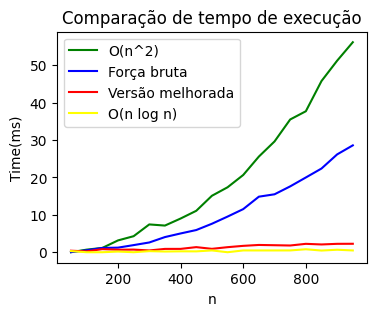

In [24]:
import matplotlib.pyplot as plt

# Initialize the plot using subplots so it can be reused in later cells
fig, graph = plt.subplots(figsize=(4, 3))
graph.plot(nValuesQuad, tValuesQuad, color="green", label="O(n^2)")
graph.plot(nValuesBrute, tValuesBrute, color="blue", label="Força bruta")
graph.plot(nValues, tValues, color="red", label="Versão melhorada")
graph.plot(nValuesLog, tValuesLog, color="yellow", label="O(n log n)")
graph.set_xlabel("n")
graph.set_ylabel("Time(ms)")
graph.set_title("Comparação de tempo de execução")
graph.legend()

# This simply avoids printing the image twice
_ = fig

**R.:** O gráfico dos tempos de execução permite-nos concluir que o algoritmo de força bruta tem um desempenho bastante próximo a $O(n^2)$, porém ligeiramente inferior, uma vez que sua ordem de complexidade é dada pela expressão $2\times\frac{(n-1)n}{2}$ calculada acima, devido ao facto de que cada iteração vai desde o índice atual até ao fim do array em vez de percorrer o array todo novamente.

Já a versão melhorada do algoritmo apresenta um gráfico muito semelhante a $O(n\log n)$, apesar de que ligeiramente superior, porém pouco relevante. Apesar disso, esta pequena diferença foi consistente em todos os testes realizados e pode-se dever ao facto de que o algoritmo conta as inversões e guarda-as em memória para passar o resultado para a execução seguinte do ciclo recursivo. Esta é apenas uma hipótese, porém pareceu-nos ser a mais plausível.

## **4)** Extra

#### **4.a)** [1 valor] Proponha possíveis melhorias ao algoritmo apresentado em **2)** e refaça os testes empíricos realizados em **3)** para avaliar se as melhorias são visíveis na prática.

- **Nota:** É esperado que fundamente o porquê de estar a propor cada melhoria. É também esperada uma breve discussão sobre a ordem de complexidade do algoritmo melhorado.


**R.:** Uma vez que o algoritmo apresentado em **2)** utiliza um array auxiliar, podemos tentar uma melhoria do mesmo, tornando-o in-place. Para isso, modificamos o array original de modo a usar menos memória.

In [25]:
def versao_melhorada_in_place(arr):
    _, inversions = count_inversions(arr)
    return inversions

def count_inversions(arr):
    if len(arr) <= 1:
        return arr, 0
    else:
        mid = len(arr) // 2
        left, inv_left = count_inversions(arr[:mid])
        right, inv_right = count_inversions(arr[mid:])
        inv_merge = merge_and_count(arr, left, right)
        # arr is returned so we can store the left and right arrays
        return arr, inv_left + inv_right + inv_merge

def merge_and_count(arr, left, right):
    i = j = inv_count = 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            arr[i + j] = left[i]
            i += 1
        else:
            arr[i + j] = right[j]
            inv_count += len(left) - i
            j += 1
            
	# Append the remaining elements of left and right, if there are any
    while i < len(left):
        arr[i + j] = left[i]
        i += 1
    while j < len(right):
        arr[i + j] = right[j]
        j += 1
    return inv_count

In [26]:
nValuesInPlace, tValuesInPlace = tryItABunch(versao_melhorada_in_place, testArrays)

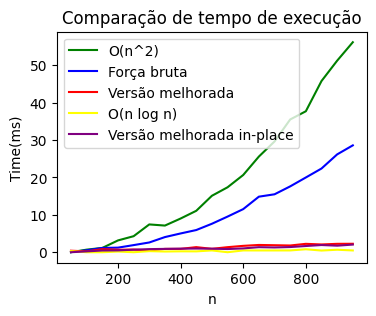

In [27]:
graph.plot(nValuesInPlace, tValuesInPlace, color="purple", label="Versão melhorada in-place")
graph.legend()
fig

**R.:** Como podemos concluir pelo gráfico, o tempo de execução é o mesmo ($O(n \log n)$), uma vez que esta melhoria apenas seria visível na memória utilizada pelo algoritmo.
Ainda assim estão a ser usados 2 arrays auxiliares (left e right), porém não seria possível substituí-los mantendo a ordem de complexidade do algoritmo e o seu funcionamento.

## **5)** Questões Éticas
Tente resolver os problemas apenas com os integrantes do seu grupo antes de colaborar. Escreva as suas respostas por suas próprias palavras. Nunca deve partilhar o ficheiro fonte com as suas soluções com integrantes de outros grupos.

#### **5.a)** Se colaborou com alguém fora do seu grupo, indique aqui os respetivos nomes.

**R.:** Francisco Brito, auxílio no desenho dos gráficos nomeadamente das funções de comparação $O(n^2)$ e $O(n\log n)$

#### **5.b)** Deve citar todas as fontes que utilizou fora do material da UC.

Qualquer indício de plágio implica, automaticamente, na reprovação na avaliação periódica.

Consoante a gravidade dos indícios de plágio, estes serão apropriadamente investigados e, caso se confirme que um estudante cometeu plágio, este estará automaticamente reprovado à UC.

**R.:** Apenas ferramentas de AI como Github Copilot e Microsoft Copilot para auxílio na utilização da biblioteca mathplotlib, bem como em expressões matemáticas em LaTeX.